<a href="https://www.kaggle.com/code/safaafathii/weather-classification-resnet50-acc97-vgg16-acc92?scriptVersionId=113306933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiclass-weather-dataset/dataset/test.csv
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy88.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy167.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy78.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy80.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy2.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy89.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy99.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy256.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy9.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy185.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy208.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy44.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy269.jpg
/kaggle/input/multiclass-weather-dataset/d

# Import Libraries

In [2]:
import cv2
import os
import seaborn as sn
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load Datasets

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
df_cloudy = load_images_from_folder("../input/multiclass-weather-dataset/dataset/cloudy")
df_foggy = load_images_from_folder("../input/multiclass-weather-dataset/dataset/foggy")
df_rainy = load_images_from_folder("../input/multiclass-weather-dataset/dataset/rainy")
df_shine = load_images_from_folder("../input/multiclass-weather-dataset/dataset/shine")
df_sunrise = load_images_from_folder("../input/multiclass-weather-dataset/dataset/sunrise")

# Data Visulaization

## Distribution of the Data

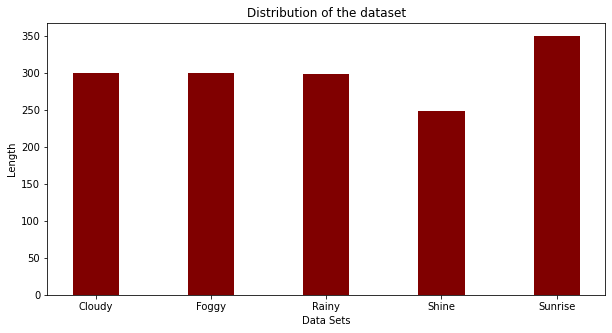

In [4]:
data_len = {"Cloudy":len(df_cloudy),"Foggy":len(df_foggy),"Rainy":len(df_rainy),"Shine":len(df_shine),"Sunrise":len(df_sunrise)}
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(list(data_len.keys()), list(data_len.values()), color ='maroon',
        width = 0.4)
 
plt.xlabel("Data Sets")
plt.ylabel("Length")
plt.title("Distribution of the dataset")
plt.show()

# Data Preprocessing

## Split data into train and validation data

In [5]:
try:
    os.makedirs('./output')
    os.makedirs('./output/train')
    os.makedirs('./output/val')
#     os.makedirs('./output/test')
except OSError:
    pass

In [6]:
os.listdir('./output')

['val', 'train']

In [7]:
import shutil
import random
import math

root_dir = '../input/multiclass-weather-dataset/dataset'
classes = ["cloudy","foggy","rainy","shine","sunrise"]

In [8]:
filename_train = []
categories_train = []
filename_val = []
categories_val = []

In [9]:
for clss in classes:
    print('------------' + clss + '-------------')
    dirtry = root_dir + '/' + clss
    files = os.listdir(dirtry)
    np.random.shuffle(files)
    base_outdir = './output/'

    for folder in ['train', 'val']:
        target_dir = base_outdir + folder
        os.makedirs(target_dir + '/' + clss)
        target_class = target_dir + '/' + clss

        if folder == 'train':
            images_to_pass = files[: math.floor(0.85*len(files))]
            for img in images_to_pass:
                filename_train.append(img)
                categories_train.append(clss)
                img = dirtry + '/' + img
                shutil.copy(img, target_class)
        elif folder == 'val':
            images_to_pass = files[math.floor(0.85*len(files)):]
            for img in images_to_pass:
                filename_val.append(img)
                categories_val.append(clss)
                img = dirtry + '/' + img
                shutil.copy(img, target_class)
#         else:
#             images_to_pass = files[math.floor(0.9*len(files)):]
#             for img in images_to_pass:
#                 img = dirtry + '/' + img
#                 shutil.copy(img, target_class)
                
    val_sum = 0
    for flowr in os.listdir('./output/val'):
        lnk = './output/val/' + flowr
        val_sum += len(os.listdir(lnk))

    train_sum = 0
    for flowr in os.listdir('./output/train'):
        lnk = './output/train/' + flowr
        train_sum += len(os.listdir(lnk))

#     test_sum = 0
#     for flowr in os.listdir('./output/test'):
#         lnk = './output/test/' + flowr
#         test_sum += len(os.listdir(lnk))

    print(val_sum)
    print(train_sum)
#     print(test_sum)

------------cloudy-------------
45
255
------------foggy-------------
90
510
------------rainy-------------
135
765
------------shine-------------
173
977
------------sunrise-------------
226
1274


In [10]:
df_train = pd.DataFrame({'filename' : filename_train , 'category' : categories_train})
df_val = pd.DataFrame({'filename' : filename_val , 'category' : categories_val})

## Normalize Data

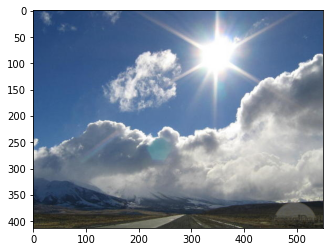

In [11]:
iamge = "../input/multiclass-weather-dataset/dataset/shine/shine116.jpg"

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread(iamge)
 
# Output Images
plt.imshow(img)

In [12]:
import os
import glob
import random
from PIL import Image
import torch
import torchvision.transforms.functional as fn
base_outdir = './output/'
count = 0
for folder in ['train', 'val']:
    for clss in classes:
        target_dir = base_outdir + folder +'/'+clss
        print(target_dir)
        files = os.listdir(target_dir)
        for file_name in files:
#             img = mpimg.imread(target_dir+'/'+file_name)
#             img = mpimg.imread(target_dir+'/'+file_name)
            try:
                img = Image.open(target_dir+'/'+file_name)
            except:
                count+=1
                continue
            
            tensor_image = fn.to_tensor(img)
            #print("The mean of our original image tensor is:",tensor_image.mean())

            #print("The standard deviation of our original image tensor is:",tensor_image.std())
            normalize = fn.normalize(tensor_image, mean=[0.5000], std=[.1000])
            pil = fn.to_pil_image(normalize)
            try:
                pil.save(target_dir+'/'+file_name)
            except OSError:
                pil=pil.convert("RGB")
                pil.save(target_dir+'/'+file_name)
#             shutil.move(os.path.join(src, filename), os.path.join(dst, filename))
        

            
   

./output/train/cloudy
./output/train/foggy
./output/train/rainy
./output/train/shine
./output/train/sunrise
./output/val/cloudy
./output/val/foggy
./output/val/rainy
./output/val/shine
./output/val/sunrise


In [13]:
print(count)

0


## Reshape the Data Images

In [14]:
import cv2
 
img = cv2.imread('../input/multiclass-weather-dataset/dataset/shine/shine151.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (159, 283, 3)
Resized Dimensions :  (256, 256, 3)


In [15]:
base_outdir = './output/'
count = 0
for folder in ['train', 'val']:
    for clss in classes:
        target_dir = base_outdir + folder +'/'+clss
        print(target_dir)
        files = os.listdir(target_dir)
        for file_name in files:
            try:
                img = cv2.imread(target_dir+'/'+file_name, cv2.IMREAD_UNCHANGED)
            except:
                count+=1
                continue
#             print('Original Dimensions : ',img.shape)
            resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
            resized = fn.to_pil_image(resized)
#             print('Resized Dimensions : ',resized.shape)
            try:
                resized.save(target_dir+'/'+file_name)
            except OSError:
                resized=resized.convert("RGB")
                resized.save(target_dir+'/'+file_name)
#             shutil.move(os.path.join(src, filename), os.path.join(dst, filename))
        


./output/train/cloudy
./output/train/foggy
./output/train/rainy
./output/train/shine
./output/train/sunrise
./output/val/cloudy
./output/val/foggy
./output/val/rainy
./output/val/shine
./output/val/sunrise


## Create Training , Validation , Test DataFrames

In [16]:
base_outdir = './output/'
all_training_path = './output/train'
count = 0
for folder in ['train', 'val']:
    for clss in classes:
        target_dir = base_outdir + folder +'/'+clss
        print(target_dir)
        for file_name in os.listdir(target_dir):
        # construct full file path
            source = target_dir+'/' + file_name
            destination = base_outdir + folder +'/' + file_name
        # move only files
            if os.path.isfile(source):
                shutil.move(source, destination)
        shutil.rmtree(target_dir)
#                 print('Moved:', file_name)

./output/train/cloudy
./output/train/foggy
./output/train/rainy
./output/train/shine
./output/train/sunrise
./output/val/cloudy
./output/val/foggy
./output/val/rainy
./output/val/shine
./output/val/sunrise


In [17]:
len(os.listdir("./output/val"))

226

# Data Augmentation

In [18]:
train_dategen = ImageDataGenerator(rotation_range = 15 , 
                                  rescale = 1.0/255 ,
                                  shear_range = 0.1,
                                  zoom_range = 0.2 , 
                                  horizontal_flip = True , 
                                  width_shift_range = 0.1 , 
                                  height_shift_range = 0.1
                                  )

In [19]:
df_train.head()

,filename,category
0,cloudy191.jpg,cloudy
1,cloudy4.jpg,cloudy
2,cloudy184.jpg,cloudy
3,cloudy42.jpg,cloudy
4,cloudy168.jpg,cloudy


In [20]:
train_generator = train_dategen.flow_from_dataframe(
    df_train, 
    "./output/train", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=15
)  

Found 1274 validated image filenames belonging to 5 classes.


In [21]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = validation_datagen.flow_from_dataframe(
    df_val, 
    "./output/val", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=15
)  

Found 226 validated image filenames belonging to 5 classes.


# ResNet50 Model

In [22]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
import tensorflow
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense , Activation , BatchNormalization

base = tensorflow.keras.applications.resnet50.ResNet50(weights = 'imagenet' , include_top = False , input_shape = (256,256,3))

2022-11-22 12:19:42.958245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 12:19:42.959321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 12:19:42.959971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 12:19:42.961530: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 1s 0us/step


In [23]:
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(5, activation= 'softmax')(x)
model = Model(inputs = base.input, outputs = predictions)

In [24]:
from tensorflow.keras.optimizers import Adam 
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop , learning_rate_reduction]

In [27]:
history = model.fit_generator(
    train_generator , 
    epochs = 30 , 
    validation_data=val_generator,
    validation_steps=df_val.shape[0]//15,
    steps_per_epoch=df_train.shape[0]//15,
    callbacks=callbacks
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-22 12:19:50.594306: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-22 12:19:56.409290: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


84/84 [==============================] - 35s 280ms/step - loss: 0.9899 - accuracy: 0.6577 - val_loss: 9.9273 - val_accuracy: 0.2000
Epoch 2/30
84/84 [==============================] - 22s 261ms/step - loss: 0.4835 - accuracy: 0.8467 - val_loss: 2.9964 - val_accuracy: 0.2000
Epoch 3/30
84/84 [==============================] - 23s 279ms/step - loss: 0.3356 - accuracy: 0.8809 - val_loss: 3.7490 - val_accuracy: 0.2000
Epoch 4/30
84/84 [==============================] - 22s 266ms/step - loss: 0.2703 - accuracy: 0.9079 - val_loss: 3.0239 - val_accuracy: 0.1956
Epoch 5/30
84/84 [==============================] - 23s 271ms/step - loss: 0.1825 - accuracy: 0.9341 - val_loss: 6.4845 - val_accuracy: 0.2000
Epoch 6/30
84/84 [==============================] - 23s 269ms/step - loss: 0.1538 - accuracy: 0.9460 - val_loss: 3.6452 - val_accuracy: 0.2000
Epoch 7/30
84/84 [==============================] - 22s 261ms/step - loss: 0.1562 - accuracy: 0.9484 - val_loss: 4.6707 - val_accuracy: 0.2133
Epoch 8/30

# VGG16 Model

In [29]:
from tensorflow.keras.applications.vgg19 import VGG19
base_model = VGG19(
    weights="imagenet",
    include_top=False, 
    input_shape=(256,256) + (3,)
)

80150528/80134624 [==============================] - 0s 0us/step


In [31]:
output = base_model.get_layer(index = -1).output  
output = Flatten()(output)
# let's add a fully-connected layer
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
# and a logistic layer -- let's say we have 4 classes
output = Dense(5, activation='softmax')(output)

In [34]:
vgg19_model = Model(base_model.input, output)
for layer in vgg19_model.layers[:-7]:
    layer.trainable = False

vgg19_model.summary()

vgg19_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])
history = vgg19_model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=val_generator,
                              callbacks = callbacks
                              )

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   